<a href="https://colab.research.google.com/github/ptripathi/NLP/blob/master/corpus_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import codecs

with codecs.open('/content/gdrive/My Drive/W266/Project/data/parallel/IITB.en-hi.hi', encoding='utf-8') as f:
    data_hi = f.read()

with codecs.open('/content/gdrive/My Drive/W266/Project/data/parallel/IITB.en-hi.en', encoding='utf-8') as f:
    data_en = f.read()

In [112]:
en_rows_all=data_en.split("\n")
hi_rows_all=data_hi.split("\n")
(len(hi_rows),len(en_rows))

(10, 10)

In [0]:
en_rows = []
hi_rows = []
for n in range(len(en_rows_all)):
  en_rows.append(en_rows_all[n].lower())
  hi_rows.append(hi_rows_all[n].lower())


In [114]:
for n in range(10,20):
  print(en_rows[n], "\n")
  print(hi_rows[n], "\n")

the color and opacity of the highlight fill. 

हाइलाइट किया गया भराई का रंग और पारदर्शिता।  

api browser 

एपीआई विचरक 

browse the various methods of the current accessible 

इस समय जिसे प्राप्त किया गया हो, उसकी विभिन्न विधियों (मेथड) में विचरण करें 

hide private attributes 

निजी गुणों को छिपाएं 

method 

विधि 

property 

गुणधर्म 

value 

मान 

ipython console 

आईपाइथन कन्सोल 

interactive console for manipulating currently selected accessible 

इस समय चुने गए एक्सेसेबेल से काम लेने के लिए अंतर्क्रियात्मक कन्सोल 

event monitor 

घटना मानिटर 



**We see that not all entries in the corpus are sentences...some are sentence segment or phrase only.**

In [0]:
en_lengths = {}
hi_lengths = {}

In [0]:
for line in hi_rows:
  sent_len = len(line.split(' '))
  if (hi_lengths.__contains__(sent_len)):
    hi_lengths[sent_len] = int(hi_lengths.get(sent_len))+1
  else:
    hi_lengths[sent_len] = 1
  

In [0]:
for line in en_rows:
  sent_len = len(line.split(' '))
  if (en_lengths.__contains__(sent_len)):
    en_lengths[sent_len] = int(en_lengths.get(sent_len))+1
  else:
    en_lengths[sent_len] = 1

In [0]:
sorted_hi = sorted([[length, counts] for length, counts in hi_lengths.items()], key = lambda x: x[0])
sorted_en = sorted([[length, counts] for length, counts in en_lengths.items()], key = lambda x: x[0])


In [119]:
# Print percentage of sentences that have length < 15
h_counts_pct = [x[1]/len(hi_rows) for x in sorted_hi]
e_counts_pct = [x[1]/len(en_rows) for x in sorted_en]

print("Hindi", sum(h_counts_pct[:15]), h_counts_pct[:15])
print("English", sum(e_counts_pct[:15]), e_counts_pct[:15])

Hindi 0.6674904807851761 [0.16787432267433114, 0.09035490808603437, 0.050892504422665304, 0.03937468666784903, 0.034230116894101256, 0.03142317303746028, 0.03110495882743506, 0.030877022693091036, 0.03021818482163037, 0.030951294017764933, 0.02903944767745244, 0.02746886526861569, 0.026422023752737955, 0.024452553108799166, 0.022806418835207936]
English 0.7043969264476986 [0.17414448717891257, 0.1017453121028325, 0.0583977498349704, 0.040178225568415736, 0.035027893364305326, 0.0344561322183244, 0.034340243341031515, 0.03385619919057062, 0.03231442893354701, 0.030932085916556166, 0.029737982291411225, 0.02756234469449835, 0.025762545611236996, 0.024051103793535963, 0.02189019240754981]


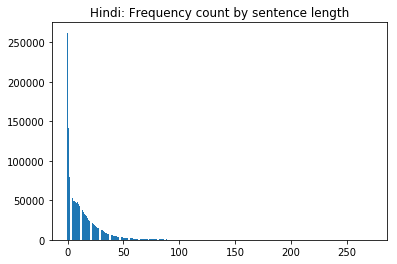

In [120]:
import matplotlib.pyplot as plt
lens = [x[0] for x in sorted_hi]
counts = [x[1] for x in sorted_hi]

plt.bar(range(len(hi_lengths)), counts, align = 'center')
plt.title('Hindi: Frequency count by sentence length')
plt.show()

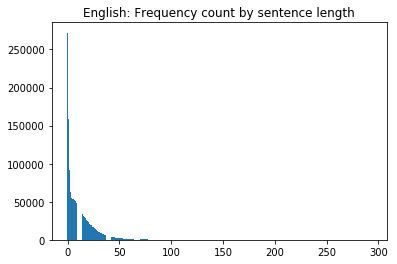

In [121]:
import matplotlib.pyplot as plt
lens = [x[0] for x in sorted_en]
counts = [x[1] for x in sorted_en]

plt.bar(range(len(en_lengths)), counts, align = 'center')
plt.title('English: Frequency count by sentence length')
plt.show()

## Find rare words in the vocab and their portion in the corpus

In [0]:
from collections import Counter
en_vocab_dict = Counter(word.strip(',.%" ;:)(][?!') for sentence in en_rows for word in sentence.split())
hi_vocab_dict = Counter(
    word.strip(',.%" ;:)(।|][?!<>a-zA-Z') for sentence in hi_rows for word in sentence.split())

en_vocab = list(map(lambda x: x[0], sorted(en_vocab_dict.items(), key=lambda x: -x[1])))
hi_vocab = list(map(lambda x: x[0], sorted(hi_vocab_dict.items(), key=lambda x: -x[1])))

In [123]:
print("Hindi vocab size:", len(hi_vocab), " || English vocab size:", len(en_vocab))

Hindi vocab size: 433545  || English vocab size: 234605


In [0]:
import data_prep;
en_vocab_dict = data_prep.buildEngVocab(en_rows)
hi_vocab_dict = data_prep.buildHinVocab(hi_rows)

In [125]:
print({k: en_vocab_dict[k] for k in list(en_vocab_dict)[:10]})
print({k: hi_vocab_dict[k] for k in list(hi_vocab_dict)[:10]})

{'give': 11407, 'your': 55399, 'application': 4787, 'an': 63175, 'accessibility': 244, 'workout': 18, 'accerciser': 37, 'explorer': 110, 'the': 1180146, 'default': 3247}
{'अपने': 77576, 'अनुप्रयोग': 2098, 'को': 316660, 'पहुंचनीयता': 48, 'व्यायाम': 323, 'का': 281893, 'लाभ': 5837, 'दें': 5825, 'एक्सेर्साइसर': 29, 'अन्वेषक': 85}


In [126]:
rare_words_en = sum(1 for x in en_vocab_dict.values() if x == 1)
(rare_words_en, rare_words_en/len(en_vocab_dict))

(102112, 0.43525074060655145)

In [127]:
len(hi_vocab_dict)

433545

We see that ~45% of the words are rare.

In [128]:
rare_words_hi = sum(1 for x in hi_vocab_dict.values() if x == 1)
(rare_words_hi, rare_words_hi/len(hi_vocab_dict))

(228761, 0.5276522621642505)

We see that over 97% of the words are rare.

In [0]:
en_vocab = list(map(lambda x: x[0], sorted(en_vocab_dict.items(), key=lambda x: -x[1])))
hi_vocab = list(map(lambda x: x[0], sorted(hi_vocab_dict.items(), key=lambda x: -x[1])))
    